In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 100
p = 3

sim = EulerSolver(
    ic=ic.sod_shock_tube_1d,
    bcx="free",
    nx=N,
    p=p,
    flux_recipe=1,
    MOOD=True,
    cascade="muscl",
    max_MOOD_iters=1,
    limiting_vars="actives",
    NAD=True,
    NAD_atol=0.0,
    NAD_rtol=1e-5,
    PAD={"rho": (0, np.inf), "P": (0, np.inf)},
    lazy_primitives=False,
)

In [3]:
sim.run(0.245)

100%|██████████| 0.245/0.245 [00:00]               


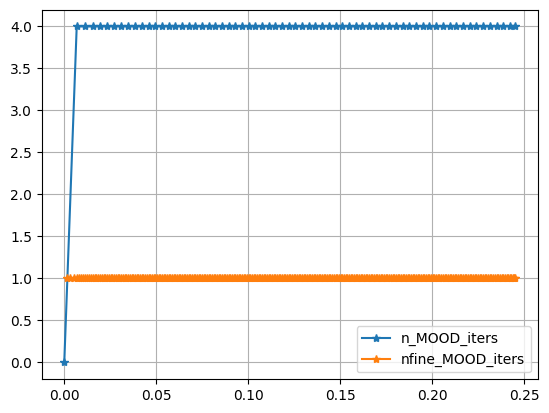

In [4]:
fig, ax = plt.subplots()
vis.plot_timeseries(sim, ax, "n_MOOD_iters", label="n_MOOD_iters", marker="*")
vis.plot_timeseries(sim, ax, "nfine_MOOD_iters", label="nfine_MOOD_iters", marker="*")
ax.grid()
ax.legend()

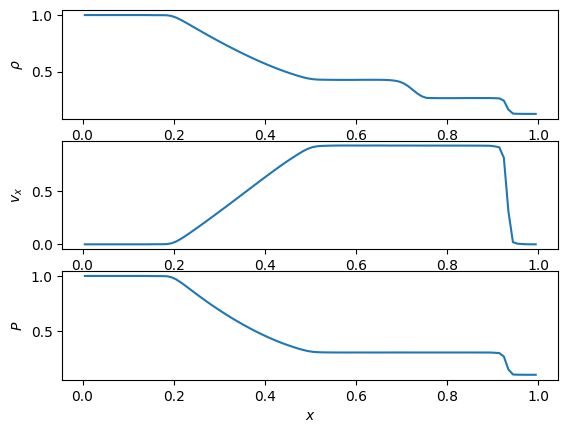

In [ ]:
fig, axs = plt.subplots(3, 1)

axs[0].set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim, axs[0], "rho")
axs[1].set_ylabel(r"$v_x$")
vis.plot_1d_slice(sim, axs[1], "vx")
axs[2].set_ylabel(r"$P$")
vis.plot_1d_slice(sim, axs[2], "P", xlabel=True)